Model Accuracy: 0.867

Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.76      0.48      0.59       393

    accuracy                           0.87      2000
   macro avg       0.82      0.72      0.75      2000
weighted avg       0.86      0.87      0.85      2000



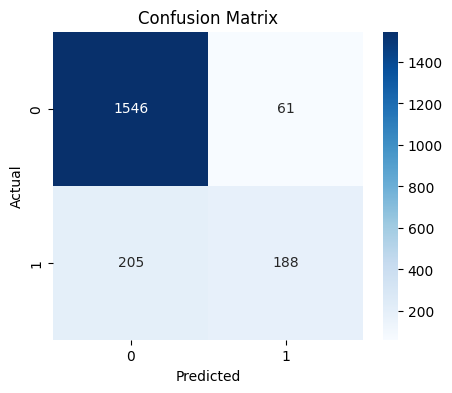

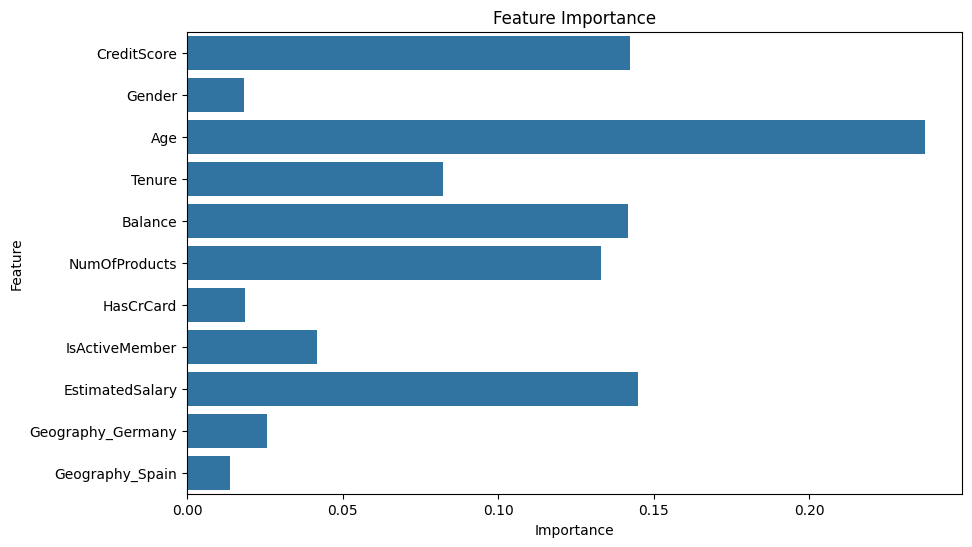

In [ ]:
#  Import necessary libraries
import zipfile
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

#  Provide the path to your ZIP file
zip_path = r"C:\Users\Admin\OneDrive\Documents\ML-INTERNSHIP\Task 3\Dataset.zip"  # Update this if needed

#  Extract ZIP file to a folder named 'data'
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall("data")
    csv_file = [f for f in zip_ref.namelist() if f.endswith('.csv')][0]

#  Load the extracted CSV file
df = pd.read_csv(os.path.join("data", csv_file))

#  View first few rows
df.head()

#  Drop unnecessary columns
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis=1, inplace=True)

#  Encode categorical features
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])  # Male=1, Female=0
df = pd.get_dummies(df, columns=['Geography'], drop_first=True)

#  Scale numerical columns
scaler = StandardScaler()
num_cols = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']
df[num_cols] = scaler.fit_transform(df[num_cols])

#  Define features and target
X = df.drop('Exited', axis=1)
y = df['Exited']

#  Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Train Random Forest model
model = RandomForestClassifier()
model.fit(X_train, y_train)

#  Predict and evaluate
y_pred = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

#  Confusion Matrix plot
plt.figure(figsize=(5,4))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

#  Feature Importance plot
importances = model.feature_importances_
features = X.columns
plt.figure(figsize=(10,6))
sns.barplot(x=importances, y=features)
plt.title("Feature Importance")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()